Email Binary Classification(Spam/Ham)

Our Project Aims To Investigate The Parameters/Factors That Affect Specific Classification AlgorithimsIn Order To Detect Spam Emails With High Accuracy.

In [12]:
import os
import glob
import numpy as np
import email
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

path = './'
easy_ham_paths = glob.glob(path + 'easy_ham/*')
easy_ham_2_paths = glob.glob(path + 'easy_ham_2/*')
hard_ham_paths = glob.glob(path + 'hard_ham/*')
spam_paths = glob.glob(path + 'spam/*')
spam_2_paths = glob.glob(path + 'spam_2/*')

# Function to get email content from a file
def get_email_content(email_path):
    file = open(email_path, encoding='latin1')
    try:
        msg = email.message_from_file(file)
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                return part.get_payload()  # prints the raw text
    except Exception as e:
        print(e)

# Function to get email content for multiple files, with error handling
def get_email_content_bulk(email_paths):
    email_contents = []
    for path in email_paths:
        content = get_email_content(path)
        if content is not None:
            email_contents.append(content)
    return email_contents

# Load data
ham_paths = [easy_ham_paths, easy_ham_2_paths, hard_ham_paths]
spam_paths = [spam_paths, spam_2_paths]

ham_data = [get_email_content_bulk(path_list) for path_list in ham_paths]
spam_data = [get_email_content_bulk(path_list) for path_list in spam_paths]

ham_labels = np.zeros(sum(len(data) for data in ham_data))
spam_labels = np.ones(sum(len(data) for data in spam_data))

# Combine the data and labels
all_data = np.concatenate((ham_data[0], ham_data[1], ham_data[2], spam_data[0], spam_data[1]))
all_labels = np.concatenate((ham_labels, spam_labels))

# Calculate the total number of emails
total_emails = len(all_data)

# Calculate the number of ham and spam emails
num_ham_emails = np.sum(all_labels == 0)
num_spam_emails = np.sum(all_labels == 1)


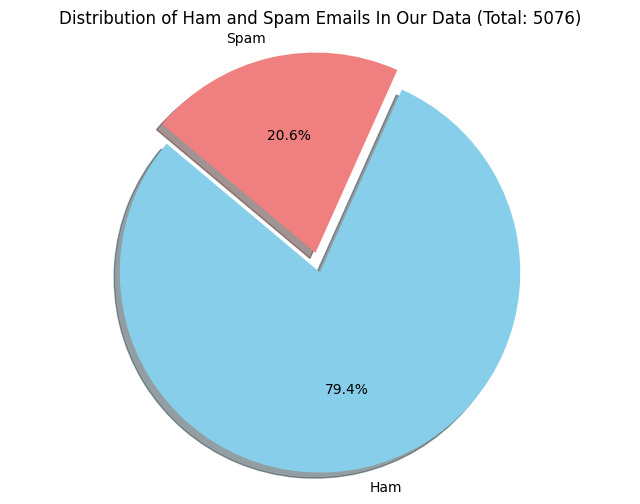

In [13]:

# Create a pie chart
labels = ['Ham', 'Spam']
sizes = [num_ham_emails, num_spam_emails]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # explode the second slice (Spam)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ham and Spam Emails In Our Data (Total: {})'.format(total_emails))
plt.show()

Spliting The Data To A Train Set And Test Set

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)


Lets Try The Naive Bayse Approach.

Accuracy: 0.9439
Precision: 0.9329
Recall: 0.7688
F1 Score: 0.8430


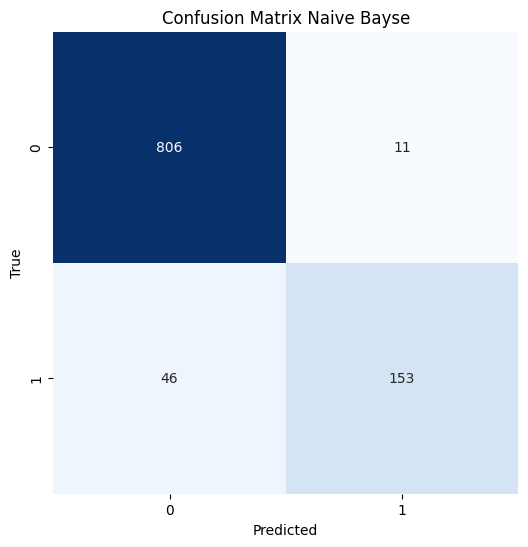

In [15]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf.toarray())

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayse')
plt.show()



Lets Investigate The Times Our Model Has Guessed Incorrectly 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most used words in false_Ham:
              Word  Frequency
3364           mv       1400
3632          the        129
2467          and         95
3647           to         92
3394           of         89
3407           or         68
3233           in         54
3161          for         36
3463        prize         32
3259           is         31
3399           on         29
2587           be         29
2624           by         26
3710       winner         26
2471          any         26
3611  sweepstakes         24
2458          all         22
3726          you         21
3287        legal         20
2476          are         19

Most used words in false_Spam:
       Word  Frequency
3341   the        928
3395    to        766
3764   you        694
413    and        614
2348    of        462
3766  your        340
3362  this        332
1711    in        324
1385   for        317
1808    is        303
1817    it        282
3339  that        212
624     br        193
2371    on        

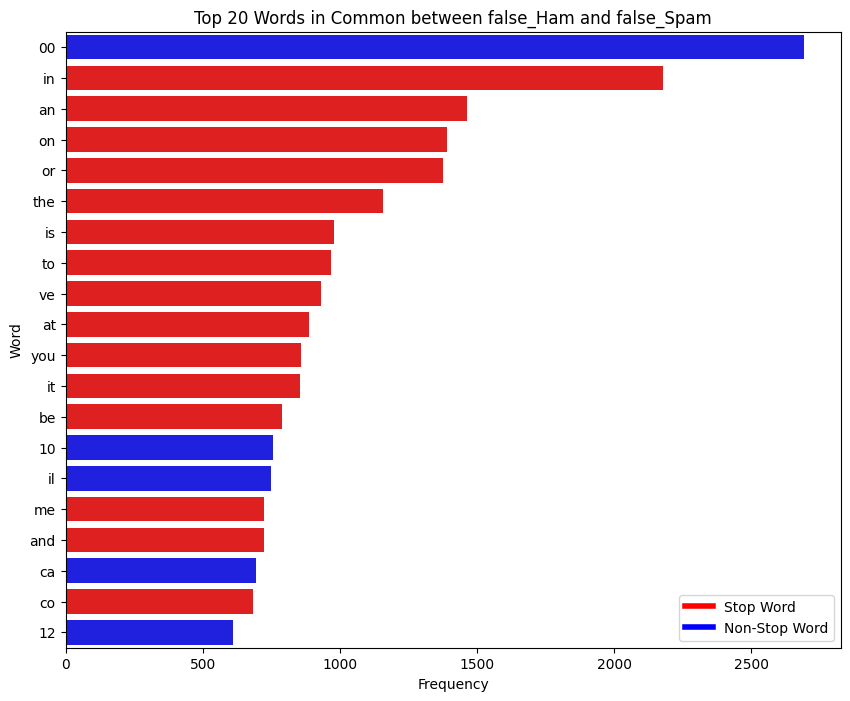

In [16]:
import random
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Download the list of English stop words if not already downloaded
nltk.download('stopwords')

# Get the English stop words from both NLTK and sklearn
nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(ENGLISH_STOP_WORDS)

# Combine both sets of stop words
english_stop_words = nltk_stop_words.union(sklearn_stop_words)

# Identify false predictions
false_ham_indices = np.where((y_test == 0) & (y_pred == 1))[0]
false_spam_indices = np.where((y_test == 1) & (y_pred == 0))[0]

# Get false ham and spam email contents
false_ham = [X_test[i] for i in false_ham_indices]
false_spam = [X_test[i] for i in false_spam_indices]

# Count word frequencies in each array
false_ham_texts = " ".join(false_ham)
false_spam_texts = " ".join(false_spam)

false_ham_vectorizer = CountVectorizer()
false_ham_vectorized = false_ham_vectorizer.fit_transform([false_ham_texts])
false_ham_word_counts = np.array(false_ham_vectorized.sum(axis=0)).flatten()

false_spam_vectorizer = CountVectorizer()
false_spam_vectorized = false_spam_vectorizer.fit_transform([false_spam_texts])
false_spam_word_counts = np.array(false_spam_vectorized.sum(axis=0)).flatten()

# Get the most used words in each array
def get_most_used_words(vectorizer, word_counts, category):
    words = np.array(vectorizer.get_feature_names_out())
    word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_counts})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Show the top 20 most used words
    print(f"\nMost used words in {category}:\n", word_freq_df)

get_most_used_words(false_ham_vectorizer, false_ham_word_counts, "false_Ham")
get_most_used_words(false_spam_vectorizer, false_spam_word_counts, "false_Spam")

# Find common words between the two arrays
common_words = set(false_ham_vectorizer.get_feature_names_out()).intersection(false_spam_vectorizer.get_feature_names_out())

# Convert sets to lists for Venn diagram labels
false_ham_list = list(false_ham_vectorizer.get_feature_names_out())
false_spam_list = list(false_spam_vectorizer.get_feature_names_out())

# Plot the intersection words
common_words_freq = []

# Predefine a set of colors for the stop words
stop_word_colors = {word: 'red' for word in english_stop_words}

# Use blue for non-stop words
non_stop_word_color = 'blue'

for word in common_words:
    frequency = false_ham_texts.count(word) + false_spam_texts.count(word)
    color = stop_word_colors.get(word, non_stop_word_color)  # Use red if it's an English stop word, otherwise use blue
    common_words_freq.append((word, frequency, color))

common_words_freq.sort(key=lambda x: x[1], reverse=True)
common_words_df = pd.DataFrame(common_words_freq, columns=['Word', 'Frequency', 'Color'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df.head(20), palette=common_words_df['Color'].head(20))
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Words in Common between false_Ham and false_Spam')

# Add custom legend
legend_elements = [plt.Line2D([0], [0], color='red', lw=4, label='Stop Word'),
                   plt.Line2D([0], [0], color='blue', lw=4, label='Non-Stop Word')]
plt.legend(handles=legend_elements)

plt.show()


We Can See by Looking in the Bar Chart Above Plotting the Most Common Words in Emails We Misclassified, that most of the words are common English stop words that can be dropped without losing the general meaning of an email,
we can also take notice that numbers in emails are confusing our model, and dropping numbers wouldn't make the email lose value, we can also assume that punctuation, capitalization, and special character can confuse our model.

To Better Understand Our Data Let's plot The Most Used Word In Each Class of Emails.

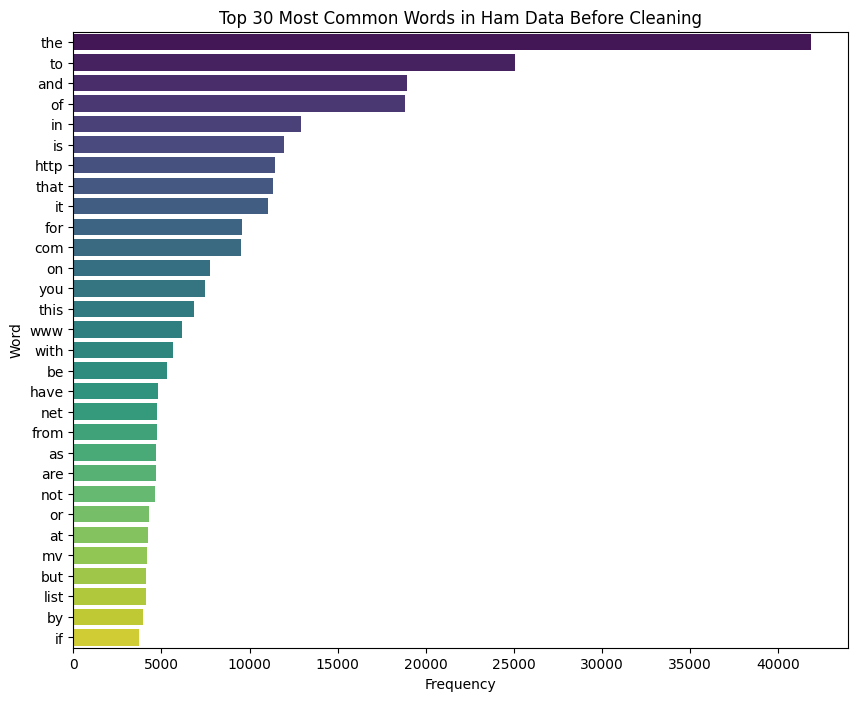

In [17]:
# Flatten the ham_data list
ham_data_flat = list(itertools.chain.from_iterable(ham_data))

# Create a CountVectorizer for ham data
ham_vectorizer = CountVectorizer()
X_ham_count = ham_vectorizer.fit_transform(ham_data_flat)

# Calculate the word frequencies
ham_word_counts = np.array(X_ham_count.sum(axis=0)).flatten()

# Get the most common words and their frequencies
ham_words = np.array(ham_vectorizer.get_feature_names_out())
ham_word_freq_df = pd.DataFrame({'Word': ham_words, 'Frequency': ham_word_counts})
ham_word_freq_df = ham_word_freq_df.sort_values(by='Frequency', ascending=False).head(30)

# Plot the top 30 most common words in ham data
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=ham_word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Ham Data Before Cleaning')
plt.show()


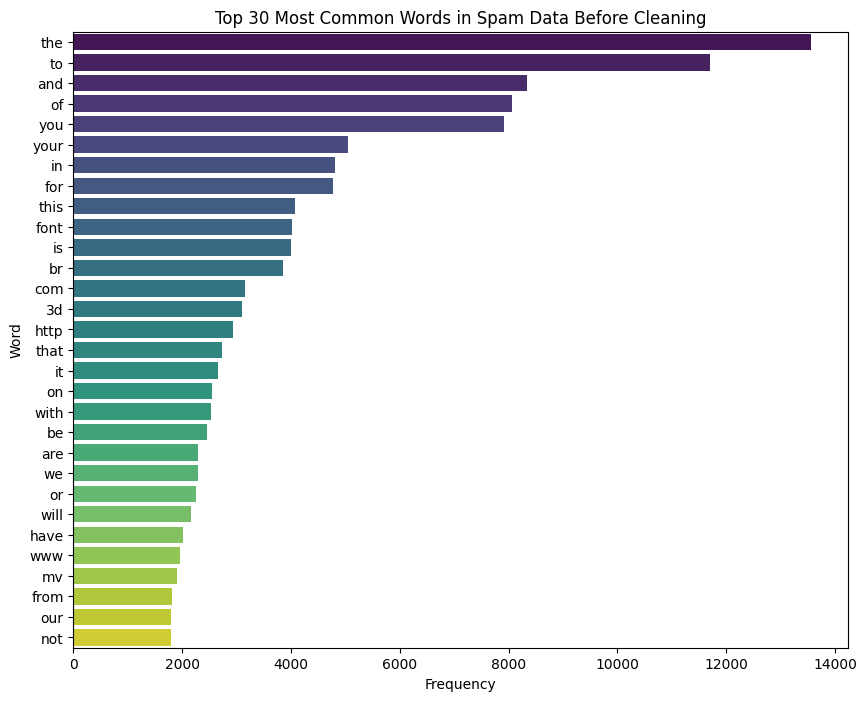

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Flatten the spam_data list
spam_data_flat = list(itertools.chain.from_iterable(spam_data))

# Create a CountVectorizer for spam data
spam_vectorizer = CountVectorizer()
X_spam_count = spam_vectorizer.fit_transform(spam_data_flat)

# Calculate the word frequencies
spam_word_counts = np.array(X_spam_count.sum(axis=0)).flatten()

# Get the most common words and their frequencies
spam_words = np.array(spam_vectorizer.get_feature_names_out())
spam_word_freq_df = pd.DataFrame({'Word': spam_words, 'Frequency': spam_word_counts})
spam_word_freq_df = spam_word_freq_df.sort_values(by='Frequency', ascending=False).head(30)

# Plot the top 30 most common words in spam data
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=spam_word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Data Before Cleaning')
plt.show()


We Can See That The Most Common Words In Spam Or Ham Are Not Unique Since We have Alot Of Common Stop Word That Are populating Both Unnecessarily 

Cleaning The Data

Here We Drop All numbers,Punctuation,Capitalization,Links and common English Stopwords.

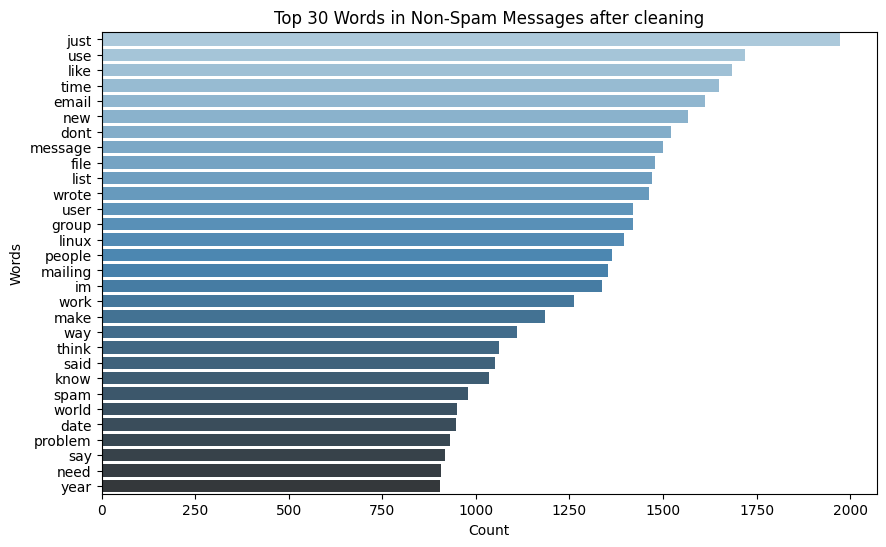

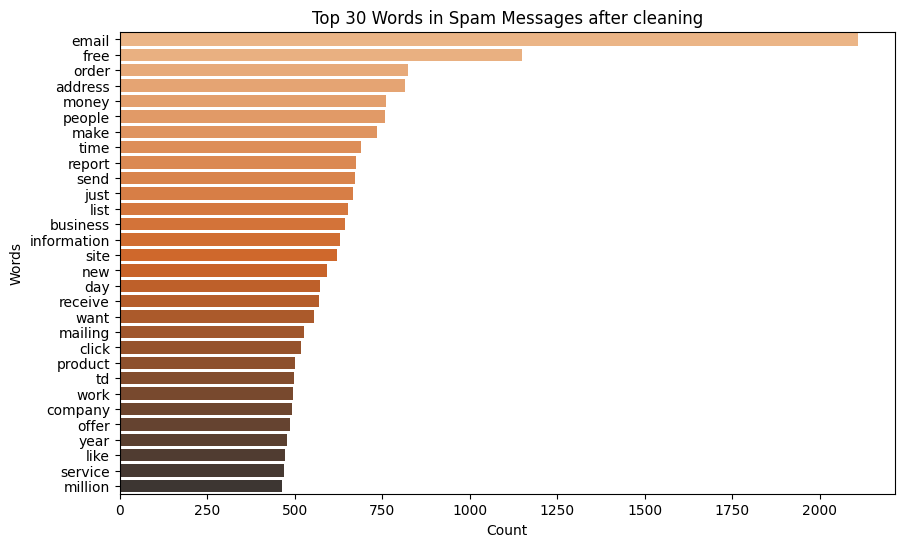

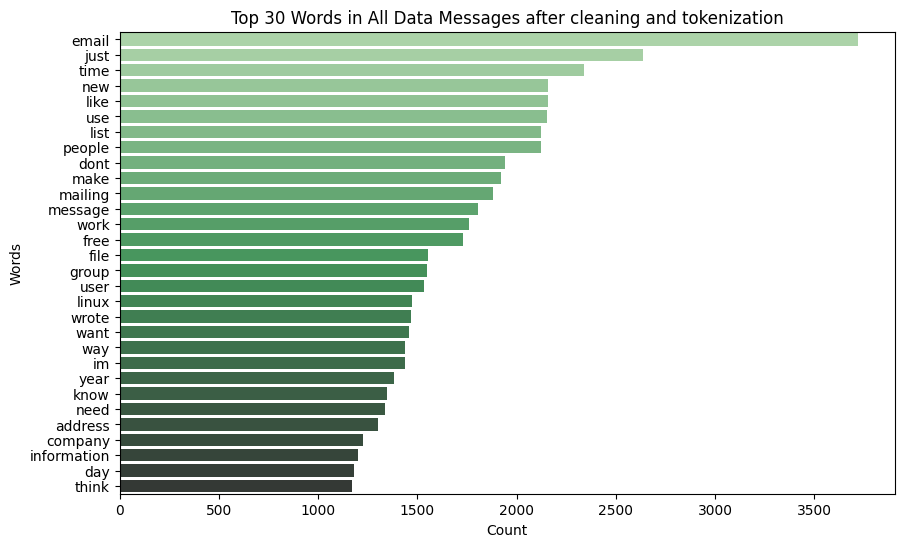

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import re
import string

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans('', '', string.punctuation))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n', '')

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace] 
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

def word_lemmatizer(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(o) for o in words]

def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words, word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

# Clean up spam messages
spam_messages_cleaned = [clean_up_pipeline(message) for message in spam_data_flat]

# Clean up non-spam messages
non_spam_messages_cleaned = [clean_up_pipeline(message) for message in ham_data_flat]

# Tokenize, remove stop words, and lemmatize the cleaned messages
spam_tokens = [word_tokenize(message) for message in spam_messages_cleaned]
non_spam_tokens = [word_tokenize(message) for message in non_spam_messages_cleaned]

spam_tokens_cleaned = [clean_token_pipeline(tokens) for tokens in spam_tokens]
non_spam_tokens_cleaned = [clean_token_pipeline(tokens) for tokens in non_spam_tokens]

# Count the cleaned tokens for spam messages
spam_words = [word for tokens in spam_tokens_cleaned for word in tokens]
spam_word_counts = Counter(spam_words).most_common(30)

# Count the cleaned tokens for non-spam messages
non_spam_words = [word for tokens in non_spam_tokens_cleaned for word in tokens]
non_spam_word_counts = Counter(non_spam_words).most_common(30)

# Plot the most frequent words in non-spam messages
data1 = pd.DataFrame(non_spam_word_counts, columns=["Words", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Words", data=data1, palette="Blues_d")
plt.title("Top 30 Words in Non-Spam Messages after cleaning")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

# Plot the most frequent words in spam messages
data2 = pd.DataFrame(spam_word_counts, columns=["Words", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Words", data=data2, palette="Oranges_d")
plt.title("Top 30 Words in Spam Messages after cleaning")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

# Clean up all_data
all_data_cleaned = [clean_up_pipeline(message) for message in all_data]

# Tokenize, remove stop words, and lemmatize the cleaned messages in all_data
all_tokens = [word_tokenize(message) for message in all_data_cleaned]

all_tokens_cleaned = [clean_token_pipeline(tokens) for tokens in all_tokens]

# Count the cleaned tokens for all_data
all_words = [word for tokens in all_tokens_cleaned for word in tokens]
all_word_counts = Counter(all_words).most_common(30)

# Plot the most frequent words in all_data messages after cleaning
data3 = pd.DataFrame(all_word_counts, columns=["Words", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Words", data=data3, palette="Greens_d")
plt.title("Top 30 Words in All Data Messages after cleaning and tokenization")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()



Let Run Naive Bayse On The Cleaned Data

Accuracy: 0.9390
Precision: 0.8870
Recall: 0.7889
F1 Score: 0.8351


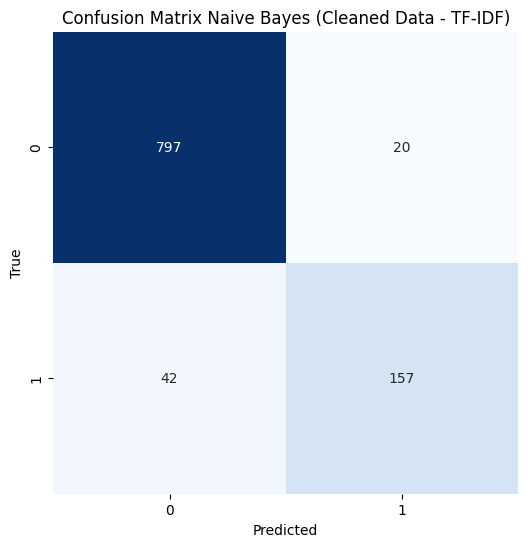

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_tokens_cleaned, all_labels, test_size=0.2, random_state=42)

# Convert tokenized lists back to sentences
X_train_sentences = [" ".join(tokens) for tokens in X_train]
X_test_sentences = [" ".join(tokens) for tokens in X_test]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the training and testing data into TF-IDF vectors
X_train_tfidf = vectorizer.fit_transform(X_train_sentences)
X_test_tfidf = vectorizer.transform(X_test_sentences)

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf.toarray())

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes (Cleaned Data - TF-IDF)')
plt.show()


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_tfidf, y_train)

# Get the best SVM classifier with tuned hyperparameters
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best SVM classifier
y_pred_svm = best_svm_classifier.predict(X_test_tfidf)

# Calculate metrics for the best SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print metrics for the best SVM classifier
print("Best SVM Classifier Metrics:")
print("Accuracy: {:.4f}".format(accuracy_svm))
print("Precision: {:.4f}".format(precision_svm))
print("Recall: {:.4f}".format(recall_svm))
print("F1 Score: {:.4f}".format(f1_svm))

# Generate and plot the confusion matrix for the best SVM classifier
cm_svm = confusion_matrix(y_test, y_pred_svm)

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best SVM classifier
svm_scores = cross_val_score(best_svm_classifier, X_train_tfidf, y_train, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation F1 Scores:", svm_scores)
print("Mean F1 Score:", np.mean(svm_scores))
print("Standard Deviation of F1 Scores:", np.std(svm_scores))


plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Best SVM Classifier Confusion Matrix')
plt.show()


AttributeError: 'list' object has no attribute 'lower'

Decision Tree On Unclean Data Then Adaboost On It.

In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier using dt_classifier as the base classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, random_state=42)
adaboost_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test_tfidf)

# Calculate metrics for AdaBoost classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Print metrics for AdaBoost classifier
print("AdaBoost Classifier Metrics:")
print("Accuracy: {:.4f}".format(accuracy_adaboost))
print("Precision: {:.4f}".format(precision_adaboost))
print("Recall: {:.4f}".format(recall_adaboost))
print("F1 Score: {:.4f}".format(f1_adaboost))

# Generate and plot the confusion matrix for AdaBoost classifier
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('AdaBoost Confusion Matrix')
plt.show()
